In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load data
df = pd.read_csv('heart.csv')

# Data exploration
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


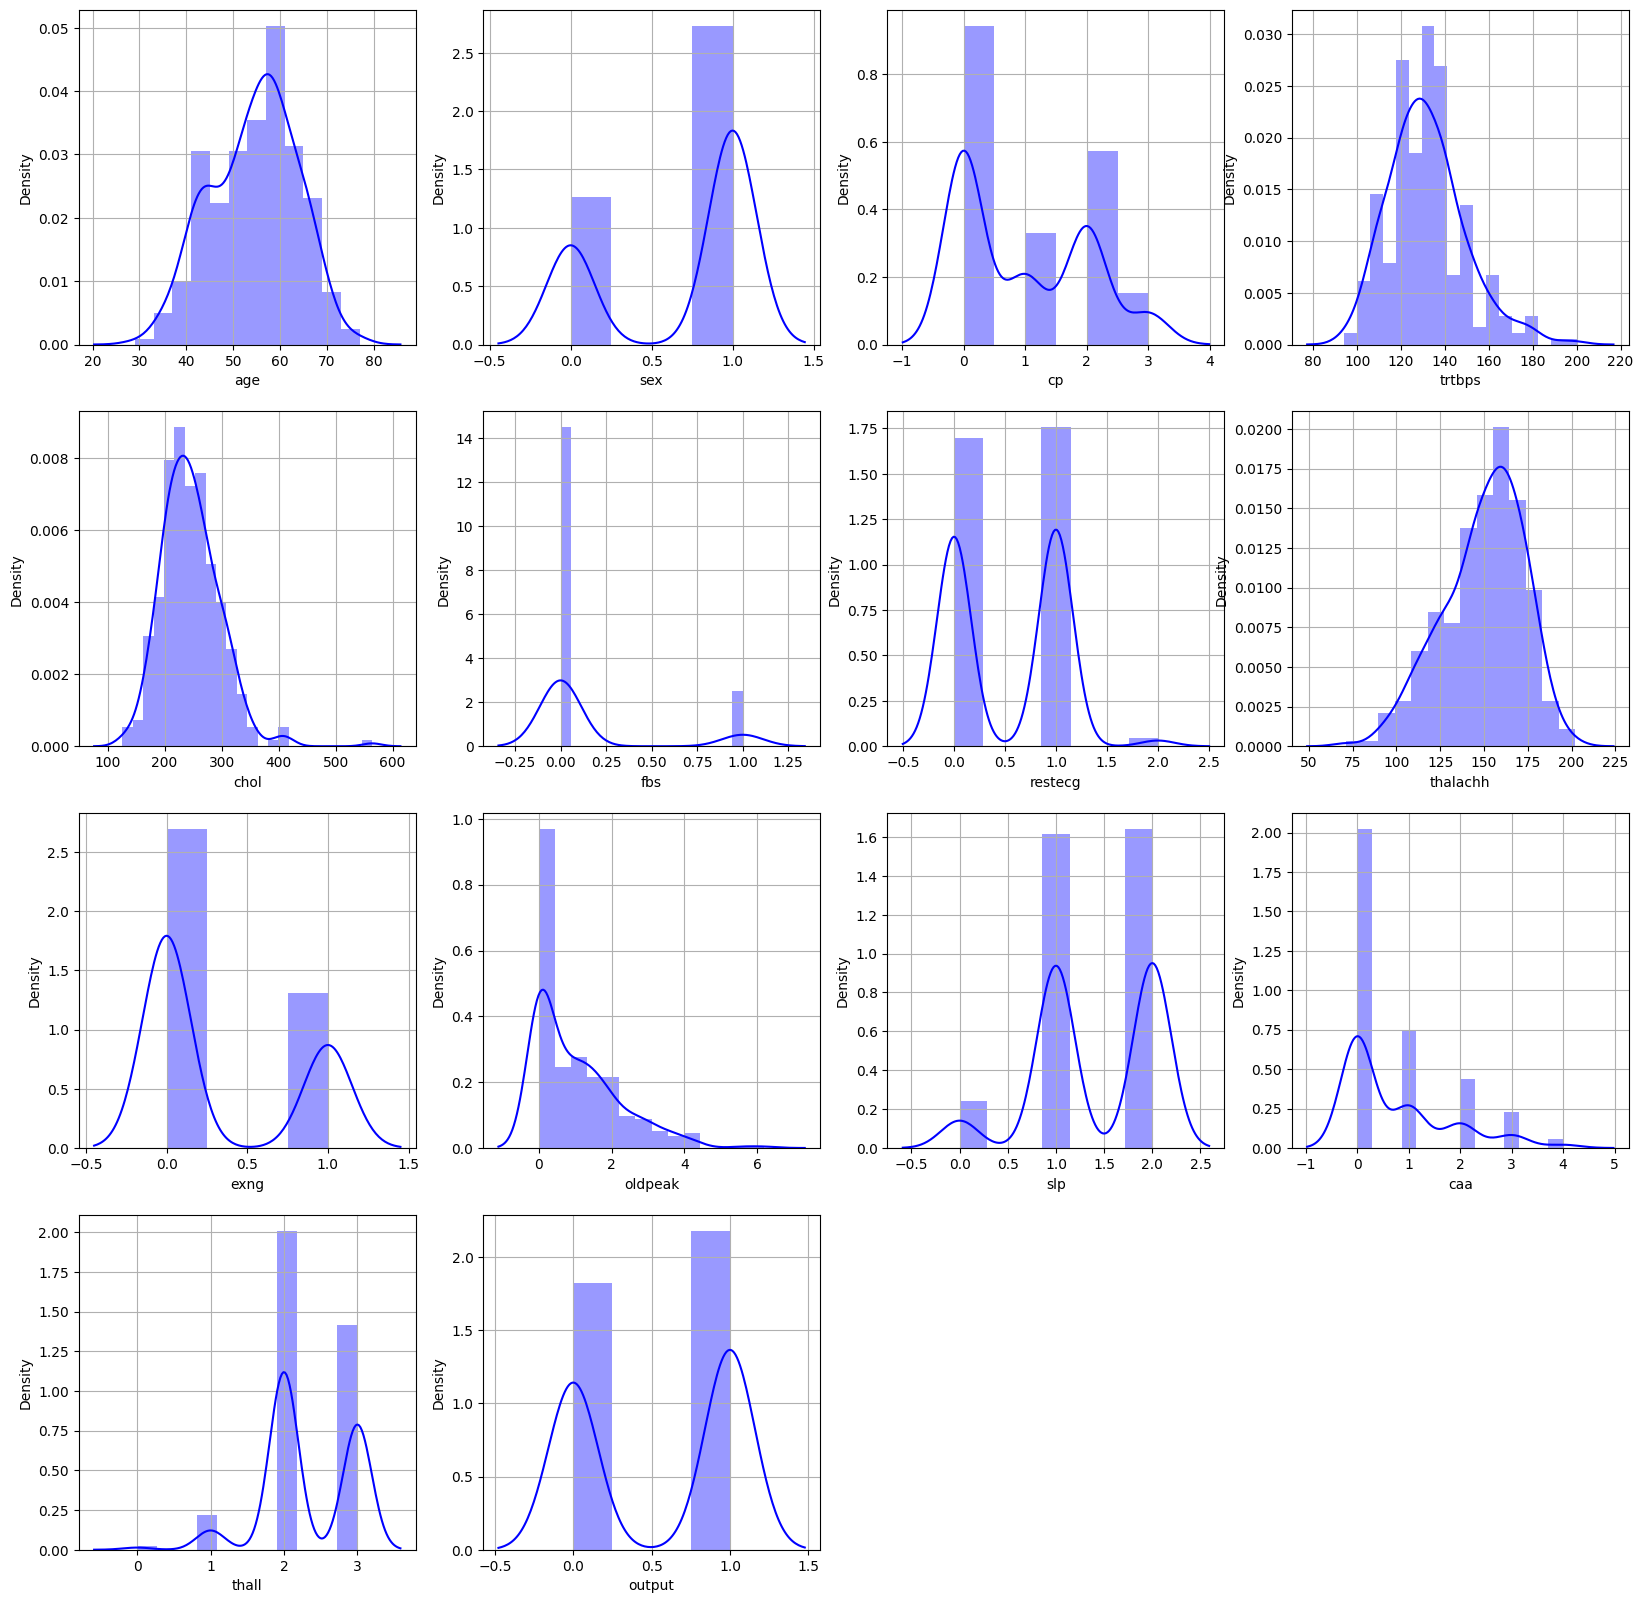

In [11]:
plt.figure(figsize = (20, 20))

for i in range(len(df.columns)):
    plt.subplot(4, 4, i+1)
    sns.distplot(df.iloc[:, i], color = 'blue')
    plt.grid()

In [13]:
# Data preprocessing
X = df.drop('output', axis=1)
y = df['output']


In [14]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [16]:
# Model evaluation
print('Logistic Regression')
print('Training Accuracy: ', log_reg.score(X_train, y_train))
print('Testing Accuracy: ', log_reg.score(X_test, y_test))

print('\nDecision Tree Classifier')
print('Training Accuracy: ', dtc.score(X_train, y_train))
print('Testing Accuracy: ', dtc.score(X_test, y_test))

print('\nRandom Forest Classifier')
print('Training Accuracy: ', rfc.score(X_train, y_train))
print('Testing Accuracy: ', rfc.score(X_test, y_test))

# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)


Logistic Regression
Training Accuracy:  0.8636363636363636
Testing Accuracy:  0.8524590163934426

Decision Tree Classifier
Training Accuracy:  1.0
Testing Accuracy:  0.819672131147541

Random Forest Classifier
Training Accuracy:  1.0
Testing Accuracy:  0.8360655737704918
